# Step 1: Import python libraries: Pandas

In [1]:
import pandas as pd

# Step 2: Load the CSV file

In [52]:
dataSet = pd.read_csv('./dataset/concrete.csv')

In [53]:
print(dataSet.head())

   cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  


In [54]:
df = pd.DataFrame(dataSet)

# Step 3: Iterate each row and read strength column

In [55]:
for index, row in df.iterrows():
    print(row['strength'])

29.89
23.51
29.22
45.85
18.29
21.86
15.75
36.64
21.65
28.99
36.35
6.94
27.92
26.26
23.89
49.97
30.08
44.86
15.04
25.1
13.36
21.92
20.42
33.3
31.74
45.3
49.19
65.2
21.54
33.8
32.04
39.29
23.74
44.52
37.91
39.16
16.88
47.71
17.54
41.41
24.28
60.32
37.42
23.52
59.2
61.46
17.2
40.68
49.9
33.4
49.25
39.0
37.27
39.3
38.22
20.28
48.67
34.57
35.23
42.35
20.73
10.38
37.34
54.9
41.05
29.98
28.63
44.3
52.04
49.8
11.41
50.46
28.1
26.92
45.08
36.94
24.13
19.42
27.42
39.15
28.47
31.02
31.25
43.06
12.84
32.24
67.57
26.31
35.3
23.8
14.59
55.9
21.5
41.84
4.9
57.23
71.3
33.4
33.4
36.25
32.96
61.89
36.8
53.1
11.98
23.85
9.74
14.5
12.18
38.63
55.65
12.05
27.68
31.35
18.13
12.79
37.36
39.4
29.45
33.36
16.26
39.64
23.79
45.94
61.07
31.03
33.19
21.86
74.7
62.5
27.77
31.88
9.99
25.08
13.22
56.34
43.57
46.68
6.88
30.65
33.72
30.39
37.72
42.8
26.74
32.53
33.21
55.51
46.68
41.15
29.59
32.84
29.59
33.01
11.47
23.84
56.4
44.3
22.35
55.26
31.45
67.7
18.13
60.28
33.4
17.24
44.42
37.68
35.34
52.42
57.03
48.59
12.47
4

# Step 4: Create an if then else block to check strength value as per above definition
Definition of compressive strength: \
1: Very low: if strength below 20 \
2: Low: if strength between 20 and 30 \
3: Moderate: if strength between 30 and 40 \
4: Strong: if strength between 40 and 50 \
5: Very strong: if strength over 50

In [56]:
def assign_strength(row):
    if row['strength'] > 50:
        return 5
    elif row['strength'] > 40:
        return 4
    elif row['strength'] > 30:
        return 3
    elif row['strength'] > 20:
        return 2
    elif row['strength'] < 20:
        return 1
    
df['strength'] = df.apply(assign_strength, axis=1)


In [57]:
print(df['strength'])

0       2
1       2
2       2
3       4
4       1
       ..
1025    1
1026    4
1027    4
1028    5
1029    5
Name: strength, Length: 1030, dtype: int64


# Step 5: Write the converted dataframe to a new csv file (“converted_concrete.csv”)

In [59]:
df.to_csv('./dataset/new/converted_concrete.csv', index=False)

# Plot the distribution in the bar chart

## Include Library

In [60]:
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag


## Histogram: Used to show the distribution of a continuous variable. It groups data into bins (intervals) and displays the frequency of data points in each bin

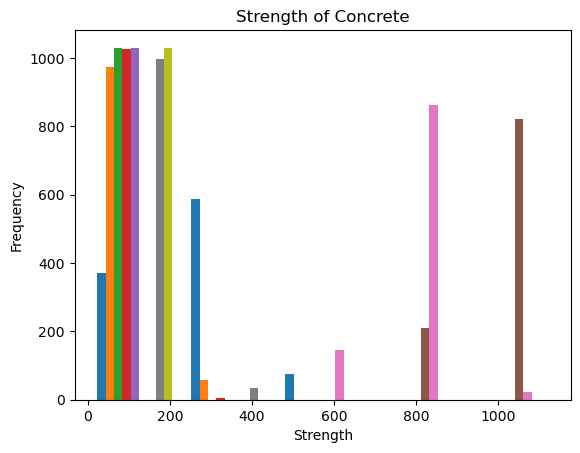

In [65]:
plt.hist(df, bins=5)
plt.xlabel('Strength') # Include the label x, y, and title
plt.ylabel('Frequency')
plt.title('Strength of Concrete')
plt.show() # Show the bar graph

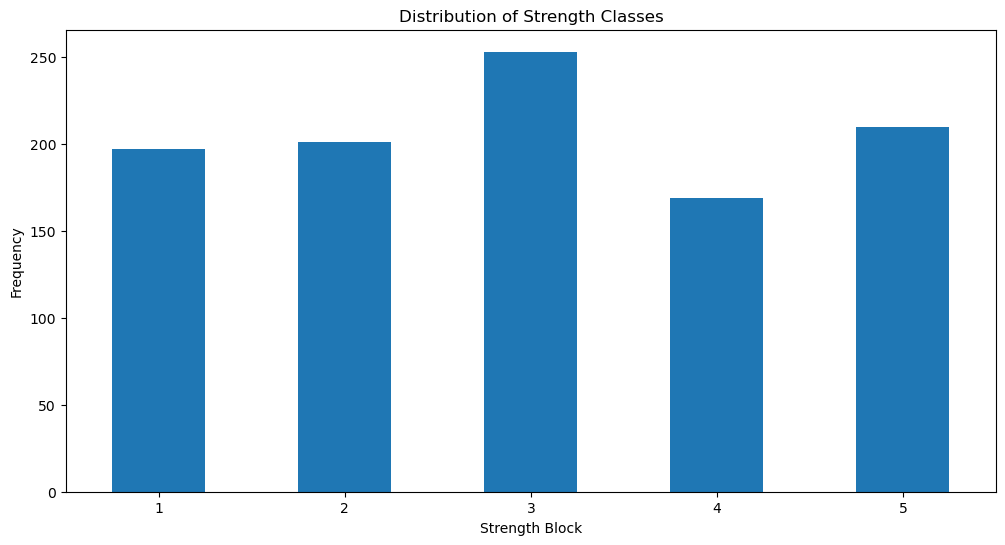

In [74]:
# Calculate the distribution of classes
class_distribution = df['strength'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(12, 6)) # Set the size of the plot to width x height
class_distribution.plot(kind='bar') # Plot the distribution in a bar graph
plt.xlabel('Strength Block')
plt.ylabel('Frequency')
plt.title('Distribution of Strength Classes')
plt.xticks(rotation=0) # Rotate the x-axis labels
plt.show()

# Determine how many unique age values are there

In [76]:
uniqueAges = df['age'].unique()
countUniqueAges = len(uniqueAges)
print("How many: ", countUniqueAges)
for i in range(countUniqueAges):
    print(uniqueAges[i])

How many:  14
28
14
90
7
56
3
100
91
180
365
270
360
120
1


1 3 7 
14 28 56 90 
100 120 180 
270 360 365

In [80]:
def AssignAges(row):
    if row['age'] > 199:
        return 4
    elif row['age'] > 99:
        return 3
    elif row['age'] > 10:
        return 2
    else:
        return 1
    
df['age'] = df.apply(AssignAges, axis=1)


In [81]:
print(df['age'])

0       2
1       2
2       2
3       2
4       2
       ..
1025    2
1026    1
1027    2
1028    4
1029    1
Name: age, Length: 1030, dtype: int64


In [ ]:
dfMaxScaled = 